<a href="https://colab.research.google.com/github/NikhilParihar-4/Codsoft-/blob/main/Iris__flower_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
data = pd.read_csv('/content/IRIS.xls')

In [3]:
data.shape

(150, 5)

In [4]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [8]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
data.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


Text(0.5, 1.0, 'Sepal Length VS Sepal Width')

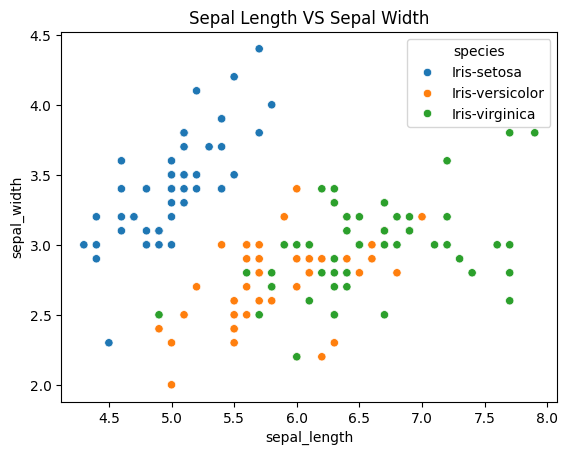

In [10]:
#Sepal = leaf structure
sns.scatterplot(data, x='sepal_length', y='sepal_width', hue='species')
plt.title('Sepal Length VS Sepal Width')

Text(0.5, 1.0, 'Petal Length VS Petal Width')

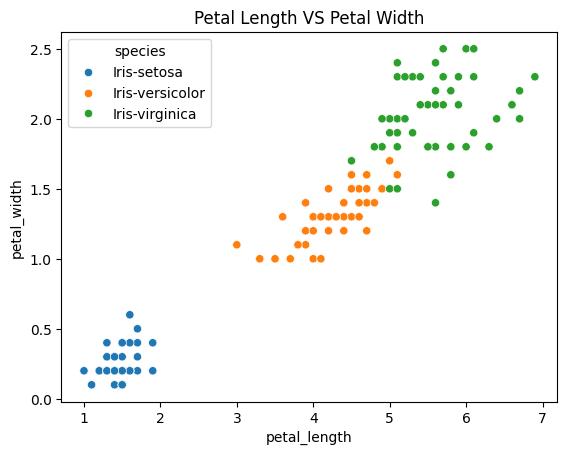

In [11]:
#Petal = flower part
sns.scatterplot(data, x='petal_length', y='petal_width', hue='species')
plt.title('Petal Length VS Petal Width')

In [12]:
#Correlation Coefficient

In [13]:
data['species'] = data['species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

In [14]:
data.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


In [15]:
type(data.corr())

pandas.core.frame.DataFrame

In [16]:
data.corr()['species']

sepal_length    0.782561
sepal_width    -0.419446
petal_length    0.949043
petal_width     0.956464
species         1.000000
Name: species, dtype: float64

In [17]:
data_df = data.drop(columns='sepal_width', axis=1)

Text(0.5, 1.0, 'Sepal Length VS Petal Length')

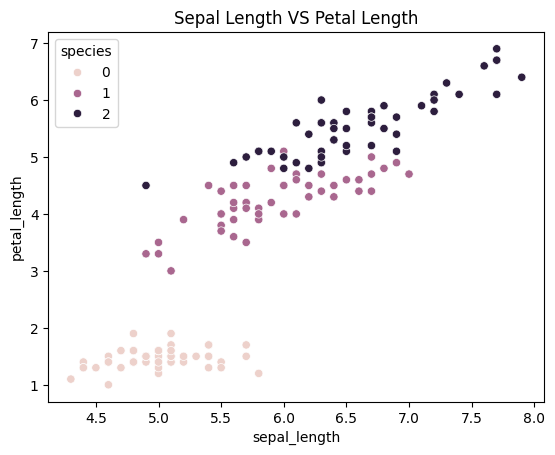

In [18]:
sns.scatterplot(data_df, x='sepal_length', y='petal_length', hue='species')
plt.title('Sepal Length VS Petal Length')

In [19]:
data_df.head()

,sepal_length,petal_length,petal_width,species
0,5.1,1.4,0.2,0
1,4.9,1.4,0.2,0
2,4.7,1.3,0.2,0
3,4.6,1.5,0.2,0
4,5.0,1.4,0.2,0


Buliding Model

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [21]:
X = data_df.drop(columns='species', axis=1)
Y = data['species']

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify=Y)

In [23]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(120, 3) (30, 3) (120,) (30,)


In [24]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, Y_train)

LogisticRegression()

In [25]:
#accuracy score prediction using Logistic  Regression

Y_train_logistic_predicted = logistic_model.predict(X_train)
acc1 = accuracy_score(Y_train, Y_train_logistic_predicted)
acc1

0.95

In [26]:
Y_test_logistic_predicted = logistic_model.predict(X_test)
acc2 = accuracy_score(Y_test, Y_test_logistic_predicted)
acc2

1.0

In [ ]:
#LogisticRegreession Model to predict species of Iris Flower
flower_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

def predict_flower(model, input_data):
  prediction_num = model.predict(input_data)[0]
  return flower_names[prediction_num]

def get_user_input():
  sepal_length = float(input("Enter sepal length (cm): "))
  sepal_width = float(input("Enter sepal width (cm): "))
  petal_length = float(input("Enter petal length (cm): "))
  return np.array([[sepal_length, sepal_width, petal_length]])

while True:
  user_input = get_user_input()
  print("\n")

  logistic_prediction = predict_flower(logistic_model, user_input)
  print("Logistic Regression Prediction: {}".format(logistic_prediction))
  print("\n")

  another_prediction = input("Do you want to predict another flower? (yes/no): ")
  if another_prediction.lower() != 'yes':
    break

Enter sepal length (cm): 5
Enter sepal width (cm): 2.9
Enter petal length (cm): 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(




Logistic Regression Prediction: Iris-versicolor


Do you want to predict another flower? (yes/no): yes
Enter sepal length (cm): 5
Enter sepal width (cm): 1.9
Enter petal length (cm): 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(




Logistic Regression Prediction: Iris-setosa


